# Part I - Ford Gobike Trip Data Exploration
## by Emmanuel Adeleye

## Introduction
Fordgobike Trip dataset contains information about the trips made using their bikes. The dataset is generated in February, 2019 containing 183412 entries with 16 features. The dataset entails the time taken for each trip, the time the trip started and ended, the loation of the start and end stations, bike id, and brief information about the user (user type, brth year, gender).
<p>Through this analysis, there will be better understandiing if the data and hiddem insights will be generated.

### Import Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
plt.rcParams["figure.figsize"] = (12, 6)

%matplotlib inline

### Import Dataset

In [2]:
# read dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
# preview dataset
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of the dataset?

In [3]:
# check the shape of the dataset
bike_df.shape

(183412, 16)

> The dataset has 183412 entries with 16 columns

## Assessing dataset

In [4]:
# check the basic distribution of quantitative data
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


> Issue with minimum age being 1878. Seems to be a typo error. So, it will be replaced with 1978 to make it valid

In [5]:
# check the basic distribution of quanlitative data
bike_df.describe(include = 'O').T

,count,unique,top,freq
start_time,183412,183401,2019-02-25 08:52:07.5820,2
end_time,183412,183397,2019-02-11 08:03:22.6020,2
start_station_name,183215,329,Market St at 10th St,3904
end_station_name,183215,329,San Francisco Caltrain Station 2 (Townsend St...,4857
user_type,183412,2,Subscriber,163544
member_gender,175147,3,Male,130651
bike_share_for_all_trip,183412,2,No,166053


In [6]:
# cheking datatypes of each features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> Wrong data types are noticed here. They will all be changed to the right data types

In [7]:
# check for duplicate in the dataset
bike_df.duplicated().sum()

0

> There is no duplicate in the dataset

In [8]:
# check for missing values un the dataset
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
longest = bike_df.duration_sec.max()
shortest = bike_df.duration_sec.min()
print('The longest ride was taken in {} seconds while the shortest ride was taken in {} seconds'.format(longest, shortest))

The longest ride was taken in 85444 seconds while the shortest ride was taken in 61 seconds


## Issues
* Drop null values in **start_station_id**
* Replace 1878 in <strong><i>member_birth_year</i></strong> with 1978
* Convert datatypes - **start_station_id**, **end_station_id**, and **bike_id** to string; **start_time**, and **end_time** to datetime
* Extract weekday, date and hour from **start_time** and **end_time**
* Create **age** column

In [10]:
# make a copy of the original dataset before cleaning and exploring
bike = bike_df.copy()

## Cleaning

### Drop null values

In [11]:
# dropping null values
bike = bike[~(bike.start_station_id.isna())]

In [12]:
# checking
bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

### Replace 1878 with 1978

In [13]:
# replacing 
bike.member_birth_year.replace(1878, 1978, inplace = True)

# checking
bike[bike.member_birth_year == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Convert datatypes

> #### Convert start_station_id, end_station_id, and bike_id to string

In [14]:
# store the columns to be converted in  a list
str_col = ['start_station_id', 'end_station_id', 'bike_id']
# loop through the list and convert to string
for col in str_col:
    bike[col] = bike[col].astype('str')

# remove the decimals in start_station_id and end_station_id
bike.start_station_id = bike.start_station_id.str[:-2]
bike.end_station_id = bike.end_station_id.str[:-2]

> #### Convert start_time and end_time to datetime

In [15]:
# store columns to be converted to datetime in a list
time_col = ['start_time', 'end_time']

# loop through the list and convert to datetime
for col in time_col:
    bike[col] = pd.to_datetime(bike[col])

### Extract day, date and hour of the day from start_time and end_time

In [16]:
# extract date from datetime
bike['start_date'] = bike.start_time.dt.date
# extract start hour from datetime
bike['start_hour'] = bike.start_time.dt.round("H").dt.hour
# extract end hour from datetime
bike['end_hour'] = bike.end_time.dt.round("H").dt.hour
# extract week day from datetime
bike['start_day'] = bike.start_time.dt.day_name()

### Create **age** column

In [17]:
# create age column by subtracting age from year 2019 (the year the data was recorded)
bike['age'] = 2019 - bike['member_birth_year']

# drop the birth year since it's no longer needed
bike.drop('member_birth_year', axis = 1, inplace = True)

# preview dataset for confirmation
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,start_hour,end_hour,start_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,2019-02-28,18,8,Thursday,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,No,2019-02-28,19,7,Thursday,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,2019-02-28,12,5,Thursday,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,2019-02-28,18,4,Thursday,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,2019-02-28,0,0,Thursday,45.0


#### Checking if the **<em>duration_sec</em>** is correctly computed

In [18]:
duration = np.floor((bike.end_time  - bike.start_time).dt.total_seconds())
(duration == bike.duration_sec).sum() == bike.shape[0]

True

> The duration_sec column is correctly computed!

### Creating function for plotting

In [30]:
# Plot_bar function to help with plotting bars using Matplotlib
def plot_bar(x, y, labels = None, title = None, xlabel = None, ylabel=None, color =      
None):
    sns.set_style('darkgrid')
    plt.bar(x, y, tick_label = labels, color = color, width = 0.3)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)
    
    
# Plot_bar function to help with plotting horizontal bars using Matplotlib
def plot_barh(x, y, labels = None, title = None, xlabel = None, ylabel=None, color =      
None):
    sns.set_style('darkgrid')
    plt.barh(x, y, tick_label = labels, color = color, width = 0.3)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)

# plot_barplot function to help with plotting bars using seaborn
def plot_barplot(data, x, y, title = None, xlabel = None, ylabel=None, color =      
None, order = None):
    sns.set_style('darkgrid')
    sns.barplot(data = data, x = x, y = y, color = color, ci = None, order = order)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)
    
    
# plot_hist function to help with plotting histogram using Matplotlib
def plot_hist(x, bins = None, title = None, xlabel = None, ylabel=None, color =      
None, ticks = None, labels = None):
    sns.set_style('darkgrid')
    plt.hist(x, bins = bins, color = color)
    plt.xticks(ticks, labels)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)
    
# plot_count function to help with plotting countplot using Seaborn
def plot_count(data, x , title = None, xlabel = None, ylabel=None, color = None, order = None):
    sns.set_style('darkgrid')
    sns.countplot(data = data, x = x, color = color, order = order)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)

## Univariate Exploration

### Question 1: How is duration_sec distributed?

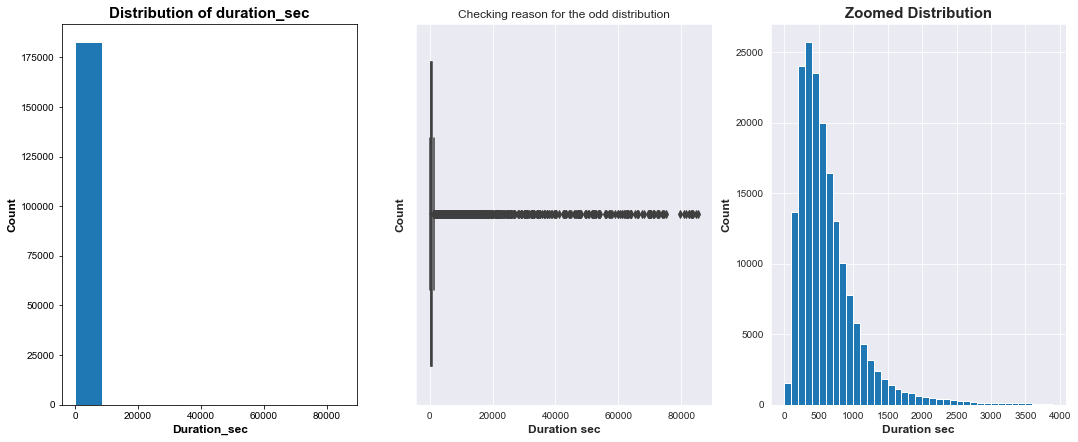

In [20]:
# creating a figure and specifying dimensions
plt.figure(figsize = (18,7))

# creating first subplot - checking the distribution of duration_sec using histogram
plt.subplot(1,3,1)
plot_hist(bike.duration_sec, xlabel = 'Duration_sec', ylabel = 'Count', title = 'Distribution of duration_sec')

# creating second subplot - checking reasons for the odd distribution above using boxplot for outliers
plt.subplot(1,3,2)
sns.boxplot(data = bike, x = 'duration_sec')
plt.ylabel('Count', weight = 'bold', fontsize = 12)
plt.xlabel('Duration sec', weight = 'bold', fontsize = 12)
plt.title('Checking reason for the odd distribution');

# creating third subplot - specifying bins for the distribution thereby zooming in on the distribution
plt.subplot(1,3,3)
bins = np.arange(0, 4000, 100)
plot_hist(bike.duration_sec, bins = bins, xlabel = 'Duration sec', ylabel = 'Count', title = 'Zoomed Distribution')

> ### Observations:
> * Checking the distribution of duration_sec with histogram didn't give much information abouth the distribution. 
> * It seems there are outliers. to check for the outliers, box plot was used and it was confirmed that few people took longer rides creating some outliers. 
> * To better check the distribution, I had to zoom in to the distribution by using bins. From the new approach, the distribution is skewed to the right i.e. less people rode long distance. Most riders rode for about 500 seconds approxiamtely 4 minutes. 

### Remove outliers in duration_sec

In [21]:
# limiting the data to duration_sec less than 4000, thereby reducing the outliers
bike = bike[bike.duration_sec < 4000]

# checking the result
bike[bike.duration_sec > 4000].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
start_hour                 0
end_hour                   0
start_day                  0
age                        0
dtype: int64

### Question 2: How often do different user types ride bikes?

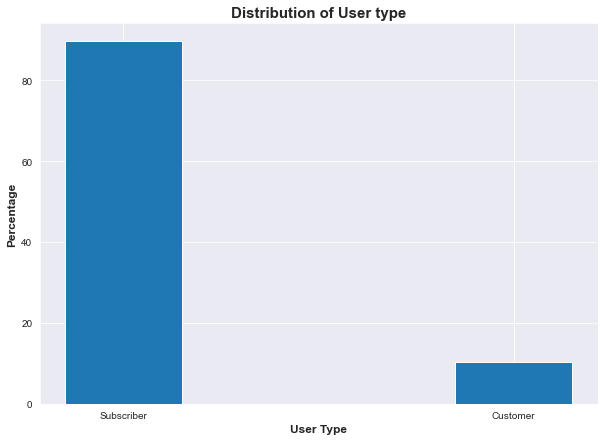

In [22]:
# crate figure size
plt.figure(figsize = (10, 7))

# creating a dataframe that counts the values of the user_types and convert the values to percentages
user_df = pd.DataFrame(bike.user_type.value_counts(normalize = True)*100).reset_index().rename(columns = {'index': 'user_type', 'user_type': 'percentage'})

# calling plot_bar function for plotting bar chart
plot_bar(user_df.user_type, user_df.percentage, title = 'Distribution of User type', xlabel = 'User Type', ylabel = 'Percentage')

> ### Observations:
> * Subscribers are the most common user types
> * They have a percentage of about 90 percentages leaving __customer__ user_type to about 10 percentage

### Question 3: How is age distributed?

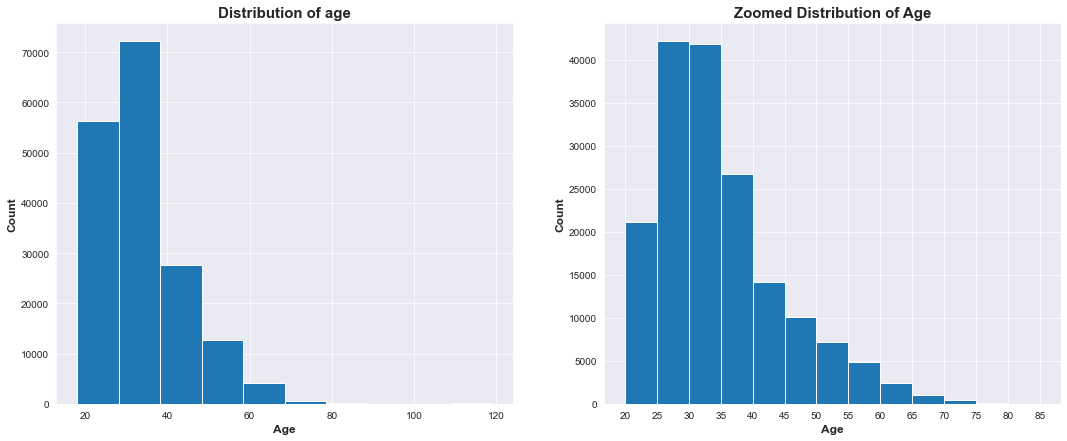

In [23]:
# creating figure and specifying the dimensions
plt.figure(figsize = (18,7))

# creating first subplot - checking age distribution 
plt.subplot(1,2,1)
# call the histogram plot function
plot_hist(bike.age, xlabel = 'Age', ylabel = 'Count', title = 'Distribution of age')

# creating second subplot - zooming in on the distribution using bins and ticks
plt.subplot(1,2,2)
bins = np.arange(20, 90, 5)
ticks = np.arange(20, 90, 5)
labels = ['{}'.format(v) for v in ticks]

# call the hisogram plot function
plot_hist(bike.age, bins = bins, labels = labels, ticks = ticks, xlabel = 'Age', ylabel = 'Count', title = 'Zoomed Distribution of Age')

> ### Observations
> From the chart:
> * The distribution of age has outliers, so ages above 80 will be dropped.
> * The distribution of age is rightly skewed. Showing that, the older a person, the lesser he tends to ride bikes.
> * The set of people that uses bike the most lies around the age group of 35 - mainly youths.
> * For better exploration, the age will be grouped into Elders, Adults and Youths

#### Dropping ouliers in age column

In [24]:
# removing columns whose age is greater than 80
bike = bike[bike['age'] < 80]
# checking
bike[bike.age > 80].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
start_hour                 0
end_hour                   0
start_day                  0
age                        0
dtype: int64

#### Creating a new column - __age group__

In [25]:
# creating bins
bins = [18, 40, 60, 80]
# creating labels
labels =['Youth', 'Adult', 'Elder']
# creating a new column - age group - using pandas' cut function, and the bins and labels created
bike['age_group'] = pd.cut(bike.age, bins = bins, labels = labels, include_lowest = True, ordered = True)

# preview the new colummn
bike.age_group.unique()

['Adult', 'Youth', 'Elder']
Categories (3, object): ['Youth' < 'Adult' < 'Elder']

### Question 4: Which day of the week do people ride bike more?

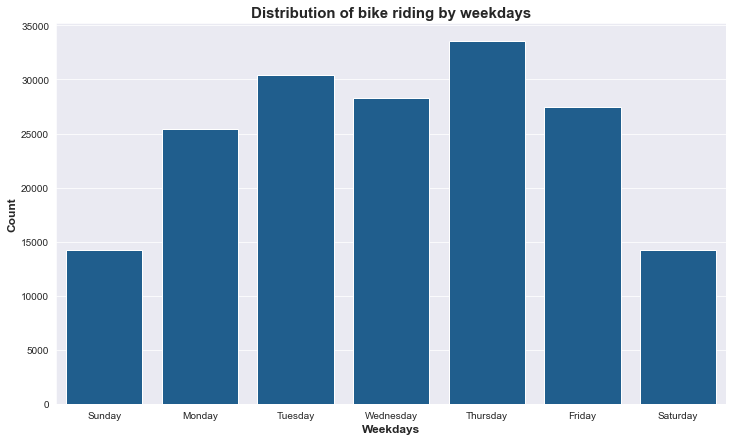

In [31]:
plt.figure(figsize = (12, 7))
plot_count(data = bike, x= 'start_day', ylabel = 'Count', xlabel = 'Weekdays',
           title = 'Distribution of bike riding by weekdays', color = '#0E609F',
           order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Observations
> * More people ride bikes on Thursdays than any other day
> * Less people ride bikes on Saturdays and Sundays with both days having approximately equal distribution 

### Question 5: Check the distribution of Members' gender

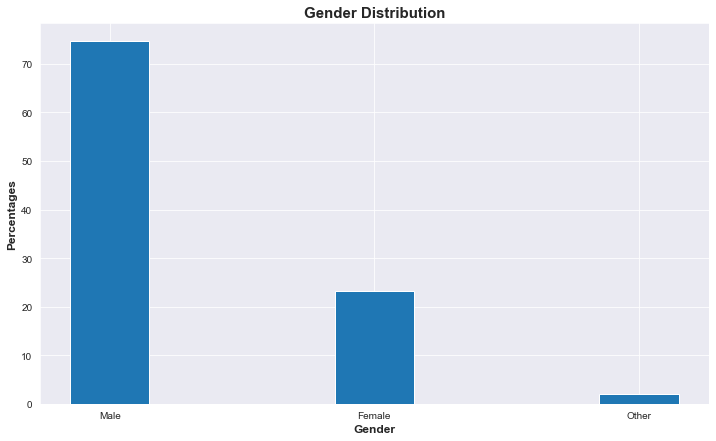

In [27]:
# create a figure size
plt.figure(figsize = (12, 7))

# create a dataframe that the gender values and change it to percentage
gender_df = pd.DataFrame(bike.member_gender.value_counts(normalize = True)*100).reset_index().rename(columns = {'index': 'gender', 'member_gender': 'percentage'})

# calling the plot_bar function
plot_bar(gender_df.gender, gender_df.percentage, xlabel = 'Gender', ylabel = 'Percentages', title = 'Gender Distribution')

### Observations
> * More Fordgobike members are Male
> * The least of the members are those of other genders

### Question 6: Which stations were most frequently used?

In [28]:
start_station = pd.DataFrame(bike.start_station_name.value_counts(ascending = True)[-5:]).reset_index().rename(columns = {'index': 'start_station', 'start_station_name': 'count'})
start_station

,start_station,count
0,Powell St BART Station (Market St at 4th St),2583
1,Montgomery St BART Station (Market St at 2nd St),2696
2,Berry St at 4th St,2934
3,San Francisco Caltrain Station 2 (Townsend St...,3386
4,Market St at 10th St,3634


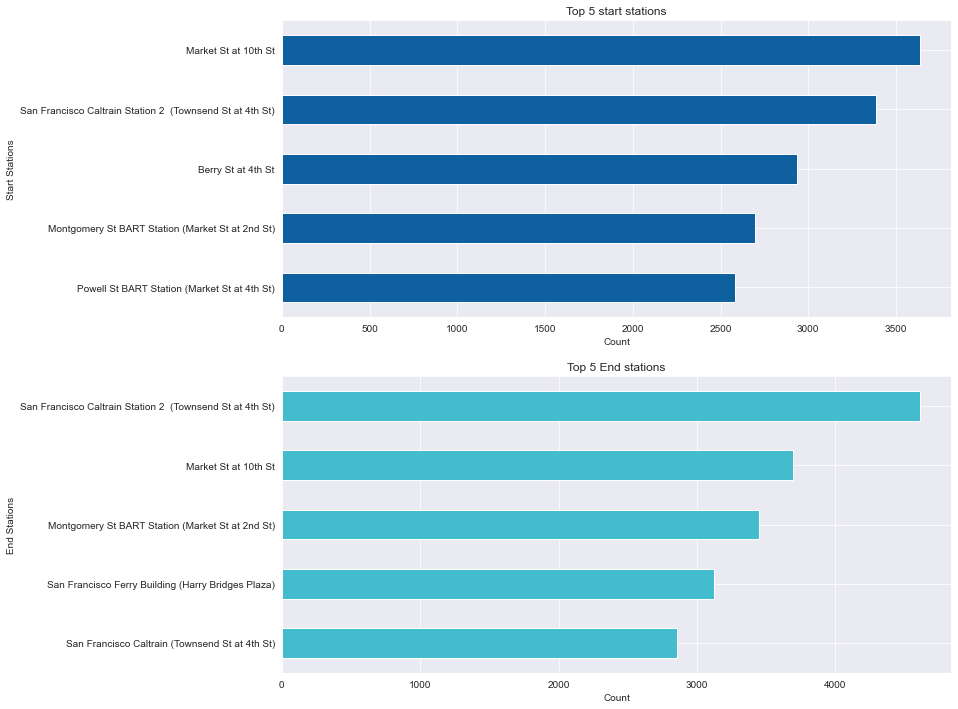

In [29]:
# creating figure and specifying dimensions
plt.figure(figsize = (12, 12))

plt.subplot(2,1,1)
# counting the end stations and plotting the top 5 stations in an horizontal bar chart
bike.start_station_name.value_counts(ascending = True)[-5:].plot(kind = 'barh', color = '#0E609F')
plt.title('Top 5 start stations')
plt.ylabel('Start Stations')
plt.xlabel('Count');

plt.subplot(2,1,2)
# counting the end stations and plotting the top 5 stations in an horizontal bar chart
bike.end_station_name.value_counts(ascending = True)[-5:].plot(kind = 'barh', color = '#43BCCD')
plt.title('Top 5 End stations')
plt.xlabel('Count')
plt.ylabel('End Stations');

### Observations
> * More trips were started at the station located at __Market st 10th street__
> * Three of the top start stations are at market street
> * Most members end their trips at San Francisco Caltrain station 2
> * The station at Market street at the 10th street seems to be more popular than other stations - it made the top start station and the second top end station

### Question 7: Which day do members ride bikes the most?

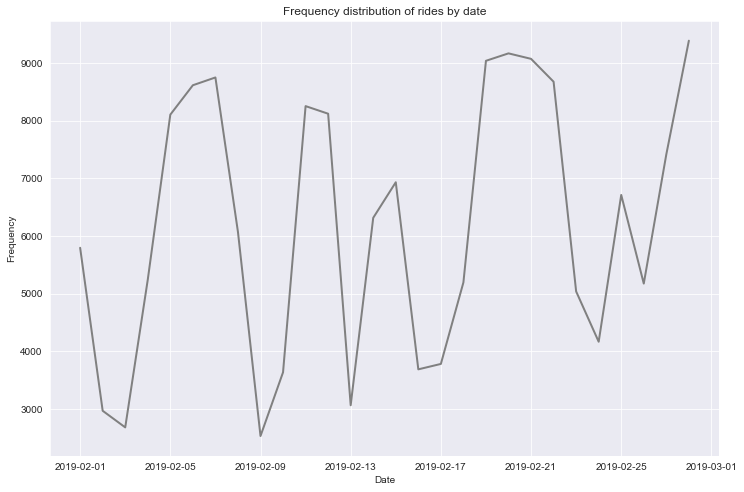

In [30]:
# creating a figure and specifying the dimensions
plt.figure(figsize = (12, 8))
# countimg start date and plotting it in a line chart
bike.start_date.value_counts().plot(kind = 'line', linewidth = 2, color = 'gray')
plt.title('Frequency distribution of rides by date')
plt.xlabel('Date')
plt.ylabel('Frequency');

### Observations
> * More members rode bikes on the last day of the month
> * February 9, 2019 has the least number of bike-riding by the members in the month

### Question 8: What time do most trips start and end?

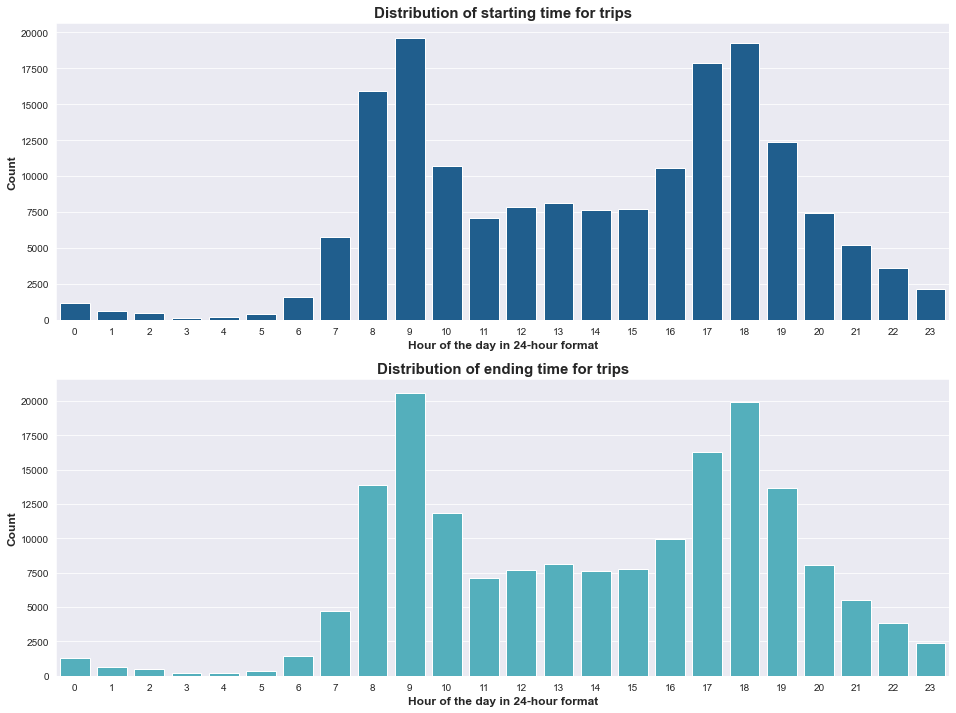

In [31]:
# creating figure and specifying dimensions 
plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)
# calling the function plot_couunt to create a count plot for start hour
plot_count(data = bike, x = 'start_hour', xlabel = 'Hour of the day in 24-hour format', 
           ylabel = 'Count', title = 'Distribution of starting time for trips', color = '#0E609F')

plt.subplot(2, 1, 2)
# calling the function plot_couunt to create a count plot for start hour
plot_count(data = bike, x = 'end_hour', xlabel = 'Hour of the day in 24-hour format', 
           ylabel = 'Count', title = 'Distribution of ending time for trips', color = '#43BCCD')


### Observations
> * The distribution of start time and end time is similar implying that most trips did not suppass the hour it was started
> * Most of the trips were taken in the morning and evening - 9AM, 6PM, 5PM, and 8AM suggesting that the trips were probably used for commuting to and from workplace 

### Question 9: Which bikes were used most?

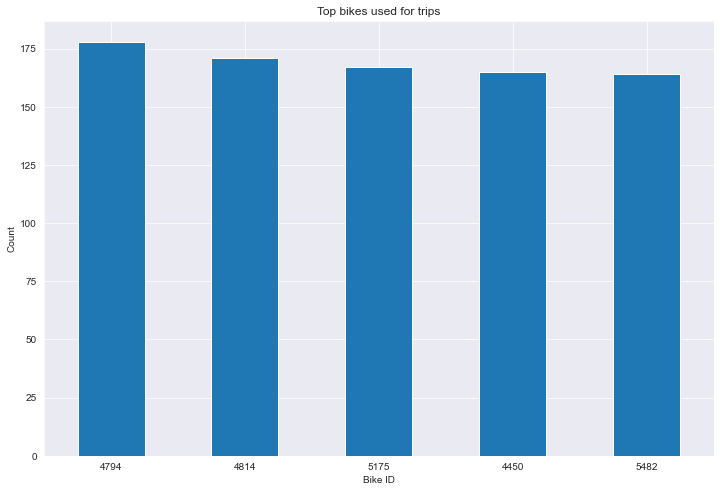

In [32]:
# creating a figure and specifying the dimensions
plt.figure(figsize = (12, 8))

# counting unique bikes by their ids and plotting the top 5 bikes used for trips
bike.bike_id.value_counts(ascending = False)[:5].plot(kind = 'bar')
plt.title('Top bikes used for trips')
plt.xlabel('Bike ID')
plt.ylabel('Count')
plt.xticks(rotation = 0);

### Observation
> The bike with the ID 4794 has been used for more trips than the others

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were unusual distribution in the duration_sec and age columns. Duration_sec above 4000 were dropped while age above 80 were also dropped.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I transformed the age column, creating a categorical variable, age_group, from it. Categorical features are due to given more insights during analysis than qualitative ones.

## Bivariate Exploration

### Question 10: Which day do members went on trips the longest?

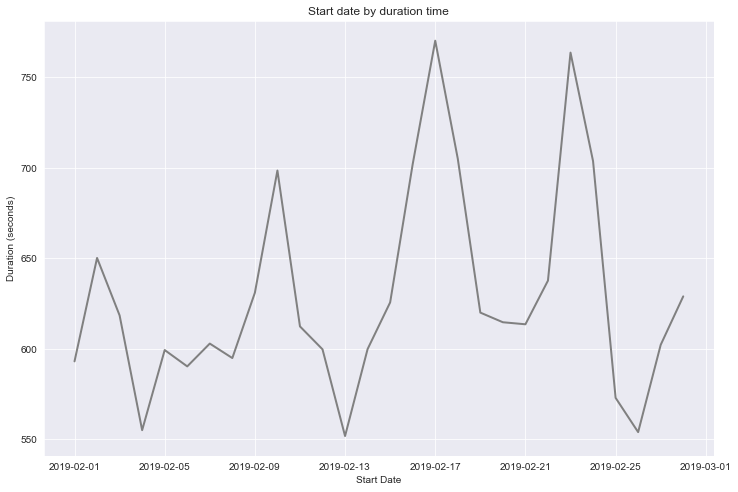

In [33]:
# create figure and set dimensions
plt.figure(figsize = (12, 8))

# plot the duration mean of bikes gouped by start date
bike.groupby('start_date')['duration_sec'].mean().plot(kind = 'line', linewidth= 2, color = 'gray')
plt.title('Start date by duration time')
plt.xlabel('Start Date')
plt.ylabel('Duration (seconds)');

### Observation
> * The longest trip was made on the 17th February with an average duration of about 780 seconds which is equivalent to 13 minutes 
> * The shortest trip was made on the 13th February with an average duration of about 550 seconds which is equivalent to 9 minutes

### Question 11: Which user type travels the longest?

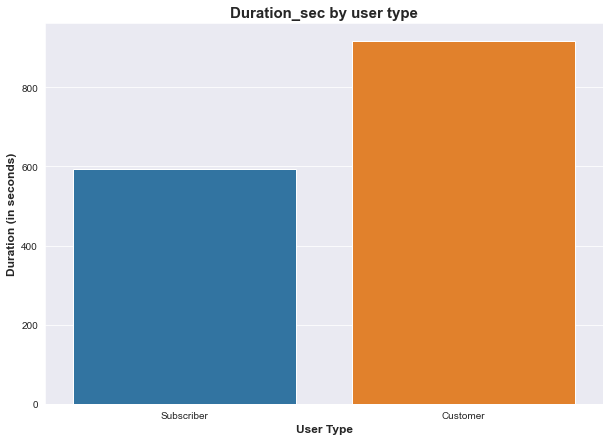

In [34]:
# create figure and specify dimensions
plt.figure(figsize = (10, 7))

# calling the plot_barplot function to create a bar plot using seaborn
plot_barplot(data = bike, x = 'user_type', y = 'duration_sec', title = 'Duration_sec by user type', 
            xlabel = 'User Type', ylabel = 'Duration (in seconds)')

### Observations
> * Though, there are more subscribers than customers (in population), yet customers has the highest average trip duration
> * This implies that subscribers do not go to long distances with the bikes unlike customers

### Question 12: Which gender rides the longest?

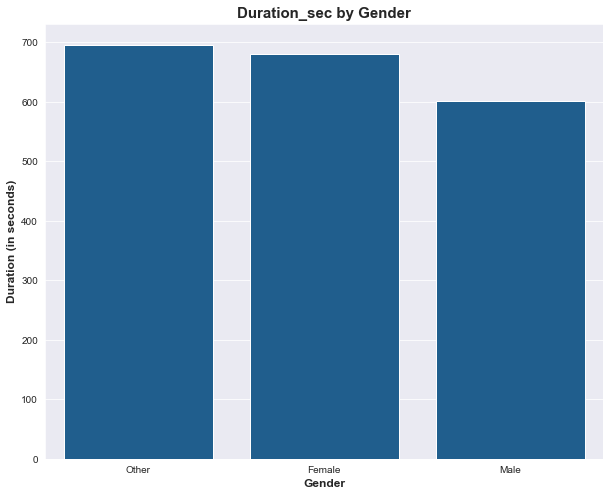

In [35]:
# create figure and specify dimensions
plt.figure(figsize = (10, 8))

# calling the plot_barplot function to create a bar plot using seaborn
plot_barplot(data = bike, x = 'member_gender', y = 'duration_sec', title = 'Duration_sec by Gender', 
            xlabel = 'Gender', ylabel = 'Duration (in seconds)', color = '#0E609F', order = ['Other', 'Female', 'Male'])

### Observations
> * The distribution is contary to their population
> * Though other gender are the least populous, they ride bikes the longest
> * And unexpectedly, male has the least duration on bikes

### Question 13: Which age group ride bike the longest?

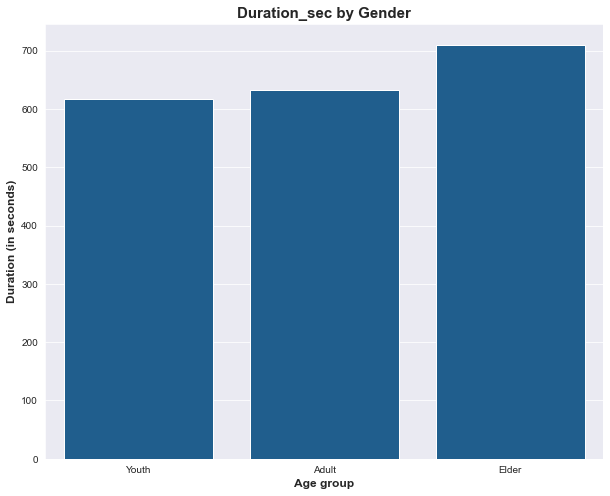

In [36]:
plt.figure(figsize = (10, 8))

# calling the plot_barplot function to create a bar plot using seaborn
plot_barplot(data = bike, x = 'age_group', y = 'duration_sec', title = 'Duration_sec by Gender', 
            xlabel = 'Age group', ylabel = 'Duration (in seconds)', color = '#0E609F')

### Observations
> * Elders travels longer than Adult and Youths, having an average duration time of about 700 seconds.
> * This could be that Youth travel with more speed compared other age groups and cover greater distance in shorter time.

## Multivariate Exploration

### Question 14: Check the relationship between user type, gender and time taken for each trip.

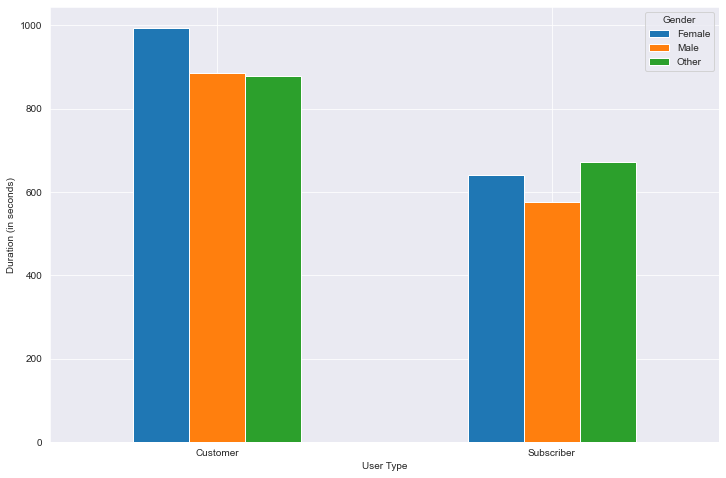

In [37]:
# group bike by user_type and member_gender, calculating the duration mean for each groupimg and then plotting it in a bar chart 
bike.groupby(['user_type', 'member_gender'])['duration_sec'].mean().unstack().plot(kind = 'bar', figsize = (12, 8))
plt.xlabel('User Type')
plt.ylabel('Duration (in seconds)')
plt.xticks(rotation = 0)
plt.legend(title = 'Gender');

### Observations
> * Considering the relationshio between User Type, Duration and Gender, it is seen that Customers takes longer time in travelling than subscibers. Though the distribution for gender is not uniform. 
> * Averagely, Female customers takes longer time for their trips while 'other' gender subscribers takes longer time for travelling.

### Question 15: Check the relationship between user types, age groups and time taken for commuting.

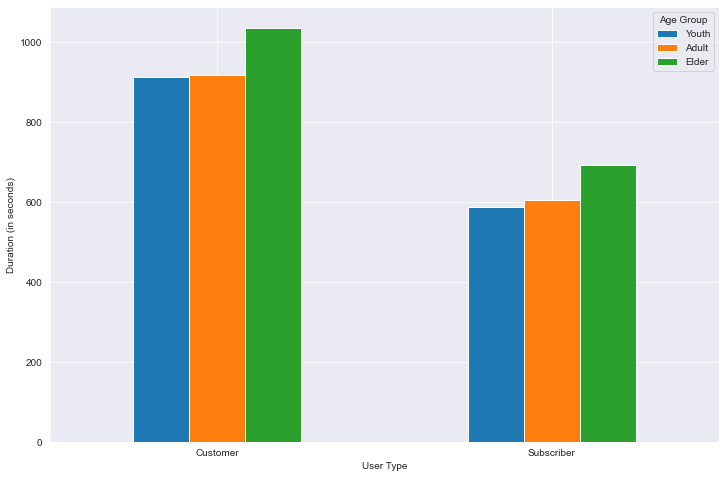

In [38]:
# group bike by user_type and member_gender, calculating the duration mean for each groupimg and then plotting it in a bar chart 
bike.groupby(['user_type', 'age_group'])['duration_sec'].mean().unstack().plot(kind = 'bar', figsize = (12, 8))
plt.xlabel('User Type')
plt.ylabel('Duration (in seconds)')
plt.xticks(rotation = 0)
plt.legend(title = 'Age Group');

### Observations
> * Regardless of the user type, the distribution of Age group is still maintained. Elders takes longer time for their trips compared to Adults and youths. This could be as result of old age and not being able to speed up while commuting. 

In [39]:
# saving the cleaned datset for use in the slide deck
bike.to_csv('cleaned_ford_gobike.csv', index = False)

## Conclusions and Recommendations
* 90% of the people using GoFord bikes are subscribers. There should a campaign or a program set up by the company to increase the number of customers using their bikes.
* People ride bikes less during weekend and they most more in the morning - 8AM to 9AM and in the evening - 5PM to 6PM suggetsing that they ride bikes to and from their work place.
* The station at Market st. 10 street is the busiest station occuring as the top start station and the second-top end station.

## Limitations
* Assumption was made that the reasons while Elders take longer time for covering their trip is due to slow speed while commuting. The lomger time taken could be due to slow speed or due to longer distance covered.
* The dataset would have been more insightful and less assumption would be made if the distance covered for each trip is recorded. From the disance, average speed can be calculated and all assumptions will either be justified or nullified.